In [35]:
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import scipy.stats as st
import pandas

In [37]:
xy = pandas.read_csv("2014_us_cities.csv")

In [38]:
x = xy["lon"].to_numpy()
y = xy["lat"].to_numpy()

### 行列数量，这个决定了生成的核密度栅格的cellsize
### 越大，表示cellsize越小，图的质量越高，但是越慢

In [39]:
row = 100j
col = 100j

#### 这个是extent

In [40]:
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

#### 这个是点的坐标集

In [41]:
values = np.vstack([x, y])

#### 这个是带宽和带宽函数
#### 注意，这个带宽还不是标准的地理单位，是根据前面那个row和col计算出来一个相对数值

In [42]:
bw = 0.1
bw_method=bw/np.asarray(values).std(ddof=1)

In [43]:
X, Y = np.mgrid[xmin:xmax:row, ymin:ymax:col]
positions = np.vstack([X.ravel(), Y.ravel()])

kernel = st.gaussian_kde(values,bw_method=bw)
Z = np.reshape(kernel(positions).T, X.shape)

#### z就是结果栅格的数据集，保存下来就是栅格了，
#### 注意结果是第四象限，需要转回去

In [44]:
Z

array([[5.78206678e-40, 5.10941013e-40, 3.53952814e-40, ...,
        5.07631131e-04, 3.34968349e-04, 2.04674187e-04],
       [6.05371975e-38, 5.34976863e-38, 3.70624932e-38, ...,
        7.08632123e-04, 4.56351546e-04, 2.73689823e-04],
       [5.52098745e-36, 4.87926576e-36, 3.38048592e-36, ...,
        8.73593275e-04, 5.50033679e-04, 3.24128431e-04],
       ...,
       [3.42924626e-11, 4.34925479e-11, 4.32446449e-11, ...,
        1.26406628e-07, 1.90312883e-08, 2.25680294e-09],
       [4.42268883e-12, 5.60946124e-12, 5.57763346e-12, ...,
        1.55519164e-07, 2.34162967e-08, 2.77701636e-09],
       [4.96858610e-13, 6.30216027e-13, 6.26666572e-13, ...,
        1.66668406e-07, 2.50970992e-08, 2.97658661e-09]])

#### np.rot90(Z)将结果旋转90度，是因为计算出来的结果是
#### 第四象限的，我们需要转回第一象限去

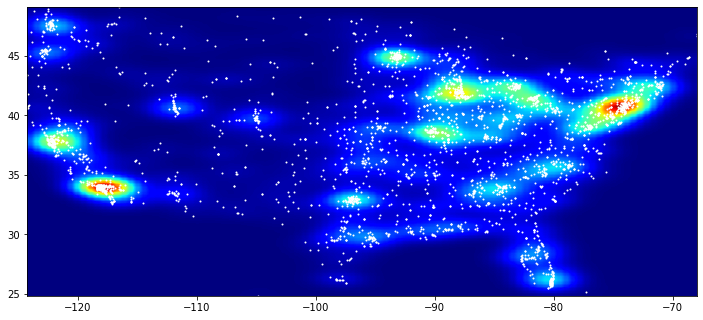

In [45]:
fig, ax = plt.subplots(figsize=(12,7))
ax.imshow(np.rot90(Z), cmap=plt.cm.jet,
           extent=[xmin, xmax, ymin, ymax])
ax.plot(x, y, 'w.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [ ]:
import rasterio
dataset = rasterio.open(
	"",
	'w',
	driver='GTiff',# 图像类型
	height=np.rot90(Z).shape[0],
	width=np.rot90(Z).shape[1],
	count=1,# 总层数
	dtype=np.float64,# 数据类型
	crs=rasterio.crs.CRS({'init': 'epsg:4326'})) 
dataset.write(np.rot90(Z),1)
dataset.close()

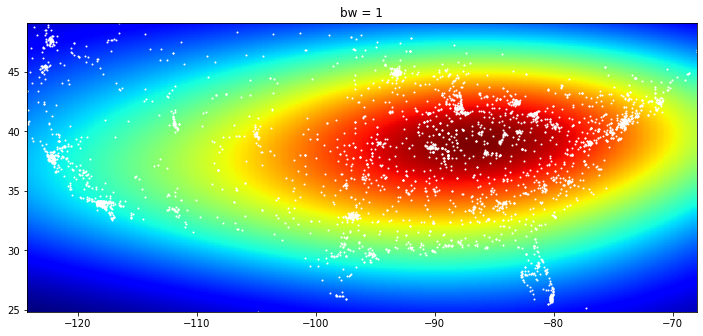

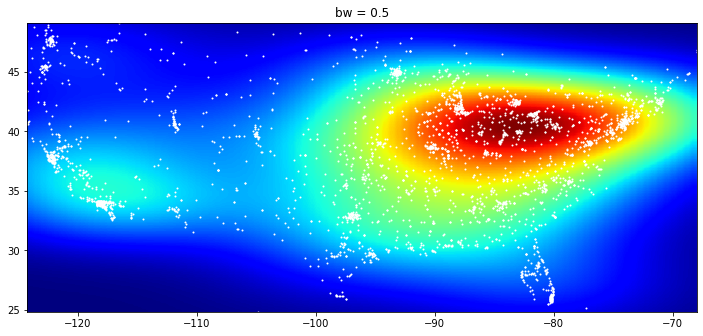

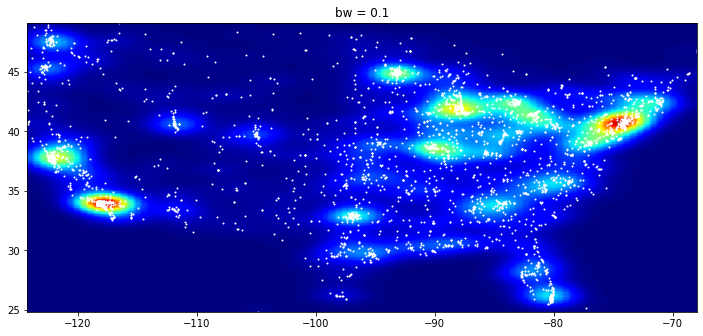

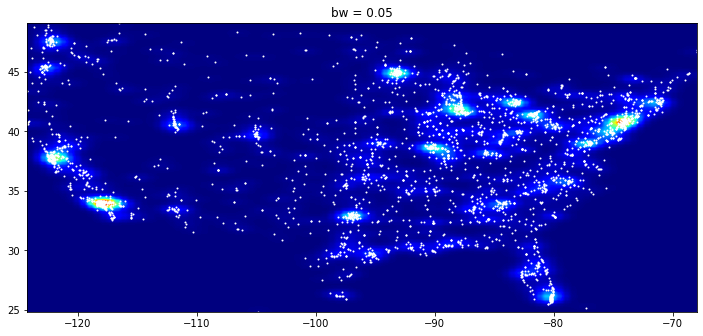

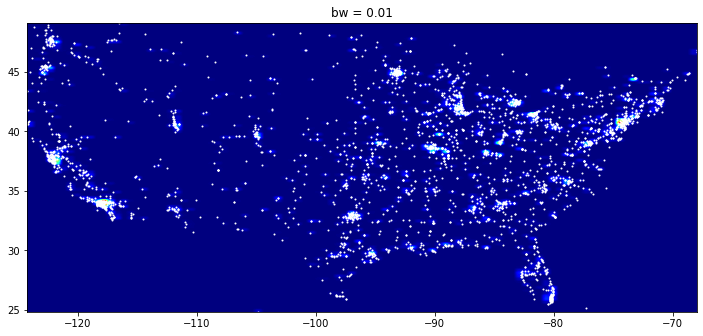

In [47]:
for i in (1,0.5,0.1,0.05,0.01):
    bw = i
    bw_method=bw/np.asarray(values).std(ddof=1)
    kernel = st.gaussian_kde(values,bw_method=bw)
    Z = np.reshape(kernel(positions).T, X.shape)
    fig, ax = plt.subplots(figsize=(12,7))
    ax.imshow(np.rot90(Z), cmap=plt.cm.jet,
           extent=[xmin, xmax, ymin, ymax])
    ax.plot(x, y, 'w.', markersize=2)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    plt.title(f"bw = {i}")
    plt.show()